In [1]:
import qutip, pickle, sys
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt 
import scipy.linalg as linalg
import time as time
import math, cmath
import auxiliary_library as me

from IPython.display import display, Math, Latex
np.set_printoptions(threshold=1.e-9,linewidth=120,precision=3, suppress=True, formatter={"float":lambda x: str(.001*int(1000*x))})

In [ ]:
N = 2; k_B = 1; temp = 1e-5; temp_ref = 1e-4; ts = np.linspace(0, 50,800)
spin_ops_list = me.one_body_spin_ops(N)
identity_op = spin_ops_list[0][0]

chain_type = "XYZ"; Hamiltonian_paras = [.2, .15, .1, 1.]

### construcción de los operadores
spin_ops_list = me.one_body_spin_ops(N)
identity_op = spin_ops_list[0][0]
ts = np.linspace(0, 50,2000)  

### Heisenberg Hamiltonian & classical operators
H_H = me.Heisenberg_Hamiltonian(op_list = spin_ops_list, chain_type = chain_type,
                                size = N, Hamiltonian_paras = Hamiltonian_paras,
                                closed_bcs = True, visualization = False)

#rho_tolerance = (-.5 * H_H).expm(); rho_tolerance = rho_tolerance/rho_tolerance.tr()
#sigma_tolerance = (-.4 * H_H).expm(); #sigma_tolerance = sigma_tolerance/sigma_tolerance.tr()

cl_ops, label_ops = me.classical_ops(H_H, N, spin_ops_list, False)
magnetization = sum(spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))
neel_operator = sum((-1)**a * spin_ops_list[3][a] for a in range(len(spin_ops_list[3])))

cl_ops["magnetization"] = magnetization; label_ops.append("magnetization")
cl_ops["neel_op"] = neel_operator; label_ops.append("neel_op")
print("Are all the operators Hermitian?:", me.basis_hermitian_check(cl_ops))

### Base completa

zero_body_ops = spin_ops_list[0]
one_body_ops = [op for op in spin_ops_list[1]+spin_ops_list[2]+spin_ops_list[3]]
two_body_ops = [op1 * op2 for op1 in one_body_ops for op2 in one_body_ops]
depth_and_seed_ops = [(1,op) for op in (zero_body_ops+one_body_ops+two_body_ops)]
print(len(depth_and_seed_ops))

using a base of size  16
rho_ref:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.52 0.0 0.0 0.005]
 [0.0 0.451 0.033 0.0]
 [0.0 0.033 0.013000000000000001 0.0]
 [0.005 0.0 0.0 0.013000000000000001]]
The basis is orthonormal and hermitian
rho_0:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.049+0.j     0.036-0.025j -0.094+0.157j -0.021+0.099j]
 [ 0.036+0.025j  0.045+0.j    -0.156+0.069j -0.07 +0.062j]
 [-0.094-0.157j -0.156-0.069j  0.694+0.j     0.362-0.121j]
 [-0.021-0.099j -0.07 -0.062j  0.362+0.121j  0.211+0.j   ]]
Proj ev runtime =  16.983850717544556
Exact ev runtime =  0.19373440742492676


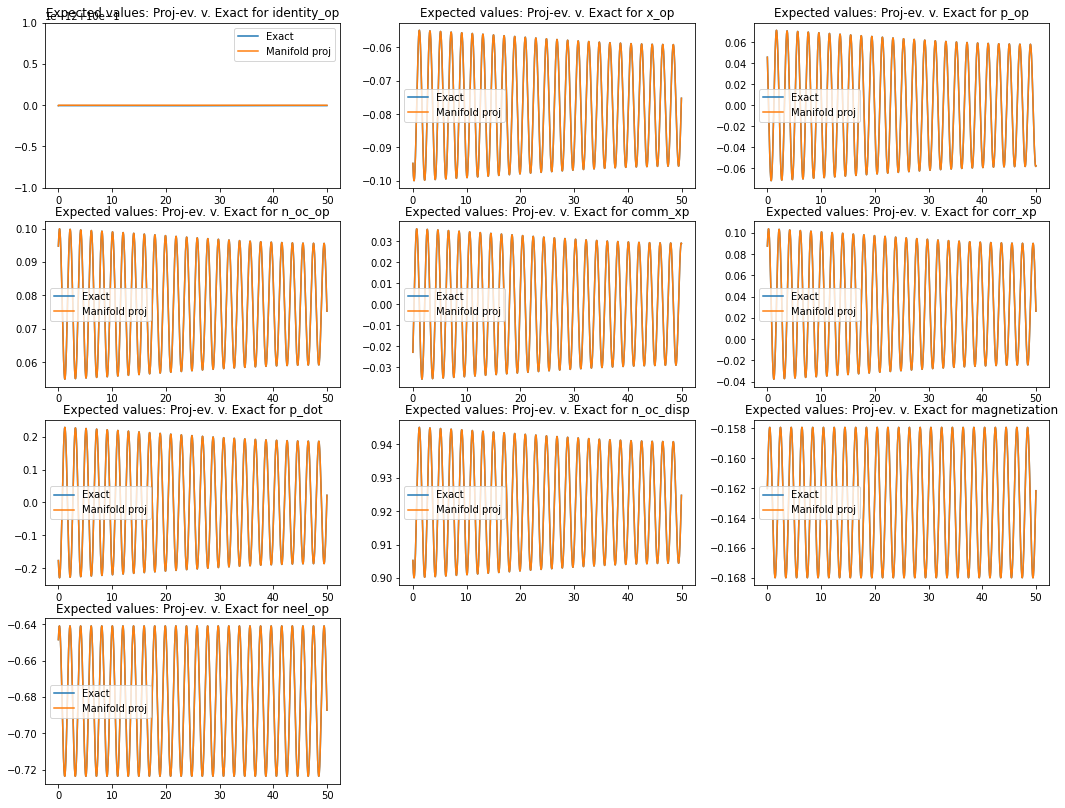

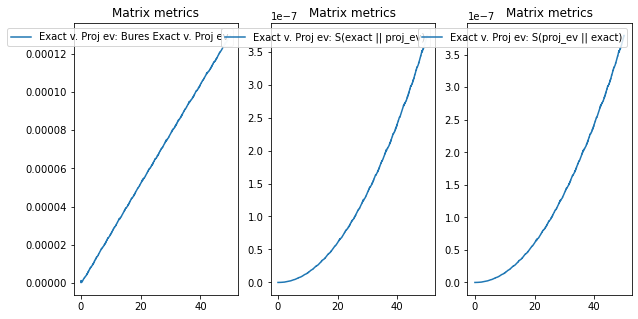

In [6]:
observables = list(cl_ops.values())
Gram_matrix, rho0, dict_res_proj_ev, res_exact, basis_orth = me.d_depth_proj_ev(
    temp_ref = temp_ref, temp_rho = temp, timespan = ts, 
    Hamiltonian = H_H, lagrange_op = cl_ops["n_oc_disp"],
    depth_and_seed_ops = depth_and_seed_ops, observables = observables, 
    label_ops = label_ops, coeff_list = None, 
    visualize_H_evs = False, visualization_nonherm = False, visualize_expt_vals = True
)

Notar que la entropía del estado "exacto" no es constante, sino que crece, mientras que la del estado aproximado oscila. La amplitud de las oscilaciones parece depender de delta t. Al hacer el paso más pequeño, la fluctuación disminuye. Lo mismo ocurre con las distancias entre el estado exacto y el aproximado.